<a href="https://colab.research.google.com/github/ali-workshop/Simple_Classify-pedestrians-and-bicyclists-based-on-their-micro-Doppler-using-deep-learning/blob/main/Simple_Classify_pedestrians_and_bicyclists_based_on_their_micro_Doppler_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import important libraries

In [ ]:
# Import NumPy library for Math Operation and use 'np' as an alias for convenience
import numpy as np

# Import KMeans clustering algorithm from scikit-learn library
from sklearn.cluster import KMeans

# Import Matplotlib library for plotting
import matplotlib.pyplot as plt

# Import h5py for handling HDF5 files
import h5py

# Import scipy.io for handling MATLAB files
import scipy.io

# Import train_test_split function for splitting datasets
from sklearn.model_selection import train_test_split

# Import accuracy_score for evaluating classification accuracy
from sklearn.metrics import accuracy_score

#  Import TensorFlow library for deep learning
import tensorflow as tf

#  Import specific layers and modules from Keras for building neural networks
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
from tensorflow.keras import optimizers


#define paths of train and test dataset

In [ ]:
data_path="/content/drive/MyDrive/ali_ali/testDataNoCar.mat"

#load train dataset

In [ ]:
# Open the HDF5 file in read-only ('r') mode using h5py
with h5py.File(data_path, 'r') as f:

    # Print the list of keys (datasets or groups) in the HDF5 file
    print(list(f.keys()))

    # Access the 'testDataNoCar' dataset and convert it to a NumPy array
    DataNoCar = np.array(f['testDataNoCar'])


#print the shape of the dataset

In [ ]:
print(DataNoCar.shape)

(5000, 1, 144, 400)


#print the shape of one sample in the dataset

In [ ]:
print(DataNoCar[0].shape)

(1, 144, 400)


#because the whole data set is very big 10 GigaByte we will apply our approach on 2 Giga Byte of data only

##our approach is clustering based classification

###the dataset has bad labels with very missing values so we will annotate our data using clustering algorithm and develope Clustering based Classification approach for solve the classification task(classifiy pedestrian and bicyclist)

###reshape the data set from 4 dimintion into 2 dimintion for feed the data into clustering algorithm and make labels for our dataset

In [ ]:
# Obtain the shape information from the 'testDataNoCar' array
num_samples, num_channels, num_bins, num_time_steps = DataNoCar.shape

# Reshape the data array to a 2D format for further processing
reshaped_data = DataNoCar.reshape(num_samples, num_channels * num_bins * num_time_steps)


In [ ]:
#print the new shape
reshaped_data.shape

(5000, 57600)

# Apply k-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


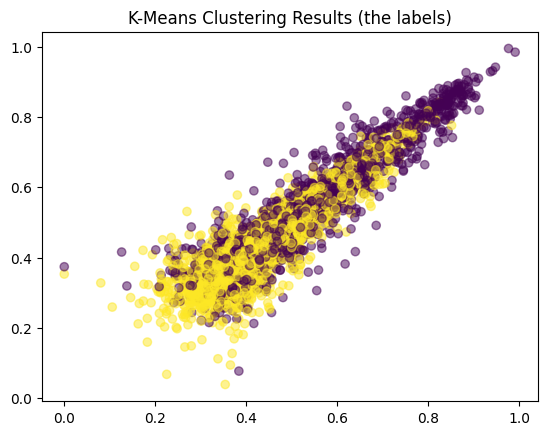

In [ ]:
# Define the number of clusters for K-Means clustering
num_clusters = 2

# Create a KMeans object with the specified number of clusters and a fixed random state
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Perform K-Means clustering on the reshaped data and obtain cluster labels
cluster_labels = kmeans.fit_predict(reshaped_data)

# Visualize the clustering results using a scatter plot (assuming 2D data for visualization)
plt.scatter(reshaped_data[:, 0], reshaped_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)

# Set the title for the plot
plt.title('K-Means Clustering Results (the labels)')

# Display the plot
plt.show()


#print the labels

In [ ]:
# Obtain unique cluster labels from the K-Means clustering results
unique_labels = np.unique(cluster_labels)


In [ ]:
#labels are [0,1] 0 refere for the pedestrian and 1 for bicyclist
unique_labels

array([0, 1], dtype=int32)

##define the features and the targets

In [ ]:
# Assign reshaped data as features (X) and cluster labels as target (y)
X = reshaped_data
y = cluster_labels


##Scaling the data and enhance the learning porcess in the machine learning models

In [ ]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the features in X
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)



#save the data to external file

In [ ]:
import pickle

# Save the data using pickle
with open('data.pkl', 'wb') as file:
    pickle.dump(X_train, file)
    pickle.dump(X_test, file)
    pickle.dump(y_train, file)
    pickle.dump(y_test, file)



#load data for re-use it


In [ ]:
import pickle

# Load the data using pickle
with open('/content/data.pkl', 'rb') as file:
    loaded_X_train = pickle.load(file)
    loaded_X_test = pickle.load(file)
    loaded_y_train = pickle.load(file)
    loaded_y_test = pickle.load(file)

#start modeling
##1-Deep learning (CNN)
   

#2-machine learning(RF,DT,KNN)




#fit the random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train a Random Forest model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


accuracy_rf  = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy for Cluster Classification: {accuracy_rf}')


Accuracy for Cluster Classification: 0.9646666666666667


In [ ]:

# Evaluate precision
precision_rf = precision_score(y_test, y_pred_rf) # Use 'weighted' for multi-class problems
print(f'Precision for Cluster Classification: {precision_rf}')

# Evaluate recall
recall_rf = recall_score(y_test, y_pred_rf) # Use 'weighted' for multi-class problems
print(f'Recall for Cluster Classification: {recall_rf}')

# Evaluate F1 score
f1_rf = f1_score(y_test, y_pred_rf) # Use 'weighted' for multi-class problems
print(f'F1 Score for Cluster Classification: {f1_rf}')

# Evaluate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix for Cluster Classification:\n{cm_rf}')



Precision for Cluster Classification: 0.9800443458980045
Recall for Cluster Classification: 0.9619151251360174
F1 Score for Cluster Classification: 0.9708951125755081
Confusion Matrix for Cluster Classification:
[[563  18]
 [ 35 884]]


#fit the Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3,random_state=1)
dt_model.fit(X_train,y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for Decision Tree Classification: {accuracy_dt}')


Accuracy for Decision Tree Classification: 0.9026666666666666


In [ ]:

# Evaluate precision
precision_dt= precision_score(y_test, y_pred_dt) # Use 'weighted' for multi-class problems
print(f'Precision for Cluster Classification: {precision_dt}')

# Evaluate recall
recall_dt = recall_score(y_test, y_pred_dt) # Use 'weighted' for multi-class problems
print(f'Recall for Cluster Classification: {recall_dt}')

# Evaluate F1 score
f1_dt = f1_score(y_test, y_pred_dt) # Use 'weighted' for multi-class problems
print(f'F1 Score for Cluster Classification: {f1_dt}')

# Evaluate confusion matrix
cm_dt= confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix for Cluster Classification:\n{cm_dt}')


Precision for Cluster Classification: 0.9387060158910329
Recall for Cluster Classification: 0.8998911860718172
F1 Score for Cluster Classification: 0.9188888888888889
Confusion Matrix for Cluster Classification:
[[527  54]
 [ 92 827]]


#fit the k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for k-Nearest Neighbors Classification: {accuracy_knn}')


Accuracy for k-Nearest Neighbors Classification: 0.9673333333333334


In [ ]:

# Evaluate precision
precision_knn= precision_score(y_test, y_pred_knn) # Use 'weighted' for multi-class problems
print(f'Precision for Cluster Classification: {precision_knn}')

# Evaluate recall
recall_knn= recall_score(y_test, y_pred_knn) # Use 'weighted' for multi-class problems
print(f'Recall for Cluster Classification: {recall_knn}')

# Evaluate F1 score
f1_knn = f1_score(y_test, y_pred_knn) # Use 'weighted' for multi-class problems
print(f'F1 Score for Cluster Classification: {f1_knn}')

# Evaluate confusion matrix
cm_knn= confusion_matrix(y_test, y_pred_knn)
print(f'Confusion Matrix for Cluster Classification:\n{cm_knn}')


Precision for Cluster Classification: 0.9627659574468085
Recall for Cluster Classification: 0.984766050054407
F1 Score for Cluster Classification: 0.973641742872512
Confusion Matrix for Cluster Classification:
[[546  35]
 [ 14 905]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
                xticklabels=['pedistrains', 'bysicalist' ],
                yticklabels=['pedistrains', 'bysicalist'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rf = confusion_matrix(y_test, y_pred_rf)

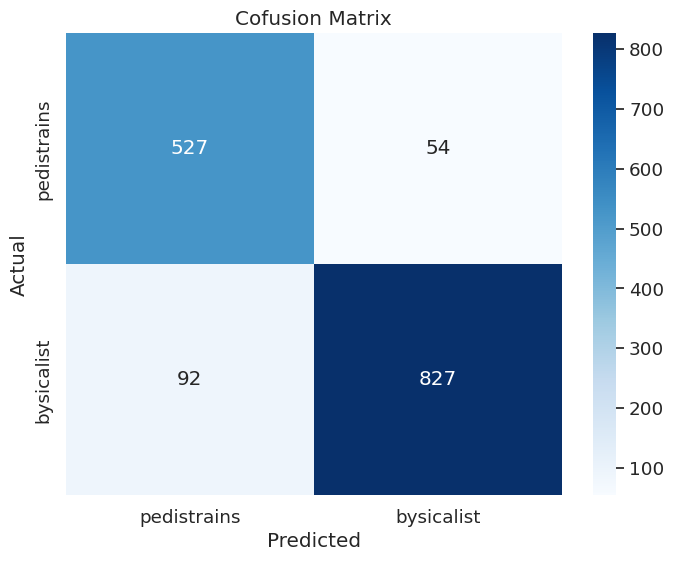

In [ ]:
plot_confusion_matrix(cm_dt,"Cofusion Matrix")

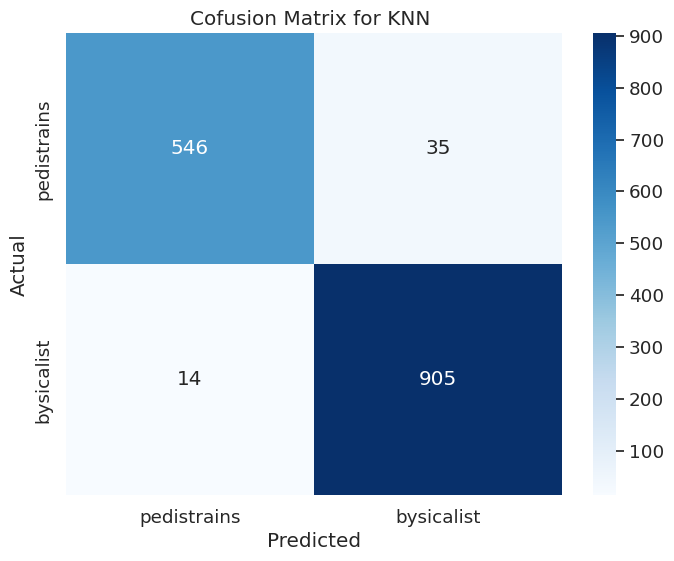

In [ ]:
plot_confusion_matrix(cm_knn,"Cofusion Matrix for KNN ")

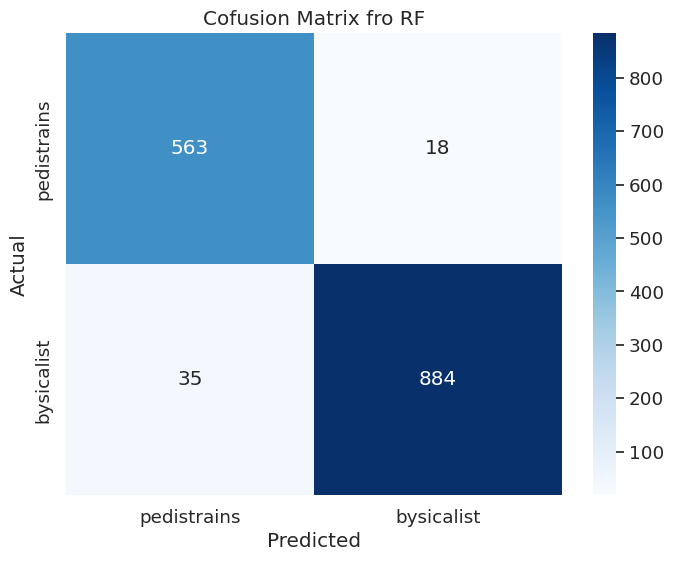

In [ ]:
plot_confusion_matrix(cm_rf,"Cofusion Matrix fro RF")

#start with the second model
#reshape the data for fit the data into CNN

In [ ]:
#the shape before reshaping
reshaped_data.shape

(5000, 57600)

In [ ]:
# Obtain the shape information from the 'testDataNoCar' array
num_samples, num_channels, num_bins, num_time_steps = DataNoCar.shape

# Reshape the data array to a 4D format for further processing
reshaped_data = DataNoCar.reshape(num_samples, num_bins, num_time_steps, num_channels)


In [ ]:
#the shape after reshaping
reshaped_data.shape

(5000, 144, 400, 1)

#define the features and the targets

In [ ]:
X = reshaped_data
y = cluster_labels



#catigorize the labels

In [ ]:
y.shape # the shape before encoding

(5000,)

In [ ]:
# Convert cluster labels to one-hot encoded format using to_categorical from Keras
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=2)


In [ ]:
y.shape # the shape after encoding

(5000, 2)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [ ]:
# Function to create a CNN model
def create_model(input_shape):

    # Build a CNN model
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(2, activation='softmax')(x)  # Assuming 2 classes for clustering
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
    model.compile(optimizer=optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Create a CNN model with input shape (144, 400, 1)
model = create_model((144, 400, 1))

# Display the model summary, which provides information about the model architecture
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 144, 400, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 142, 398, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 199, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 197, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 98, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 213248)            0     

#start the training

#define dynamic learning rate for use it as callback addition to the early-stopping callback

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced by a factor of 0.1 after every 10 epochs.
    """
    learning_rate = 1e-3
    if epoch > 10:
        learning_rate *= 0.1
    elif epoch > 20:
        learning_rate *= 0.01
    return learning_rate

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)


In [ ]:

# Train the model with early stopping and dynamic learning rate
history = model.fit(X_train, y_train, epochs=50, batch_size=128, shuffle=True,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/50
28/28 [==============================] - 21s 375ms/step - loss: 1.0224 - accuracy: 0.6646 - val_loss: 0.2726 - val_accuracy: 0.9147 - lr: 0.0010
Epoch 2/50
28/28 [==============================] - 5s 169ms/step - loss: 0.2018 - accuracy: 0.9069 - val_loss: 0.2060 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 3/50
28/28 [==============================] - 5s 172ms/step - loss: 0.1254 - accuracy: 0.9423 - val_loss: 0.1263 - val_accuracy: 0.9427 - lr: 0.0010
Epoch 4/50
28/28 [==============================] - 5s 173ms/step - loss: 0.0865 - accuracy: 0.9649 - val_loss: 0.0730 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 5/50
28/28 [==============================] - 5s 164ms/step - loss: 0.0878 - accuracy: 0.9606 - val_loss: 0.0828 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 6/50
28/28 [==============================] - 5s 162ms/step - loss: 0.0622 - accuracy: 0.9757 - val_loss: 0.0763 - val_accuracy: 0.9627 - lr: 0.0010
Epoch 7/50
28/28 [==============================] - 5s 172ms/step - l

#plot the Confusion Matrix (CM)

47/47 [==============================] - 1s 15ms/step


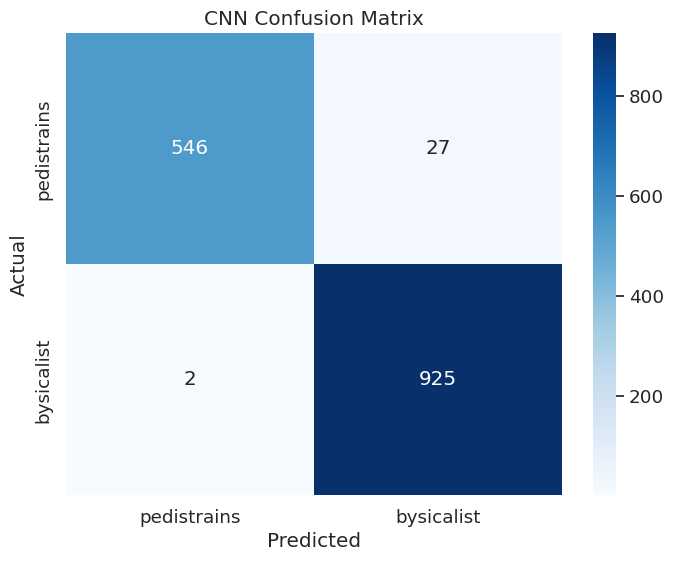

In [ ]:
# Step 1: Make predictions on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
predictions = model.predict(X_test)

# Step 2: Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), predicted_labels)
# Step 4: Plot the confusion matrix
plot_confusion_matrix(conf_matrix,"CNN Confusion Matrix")

#model evaluation

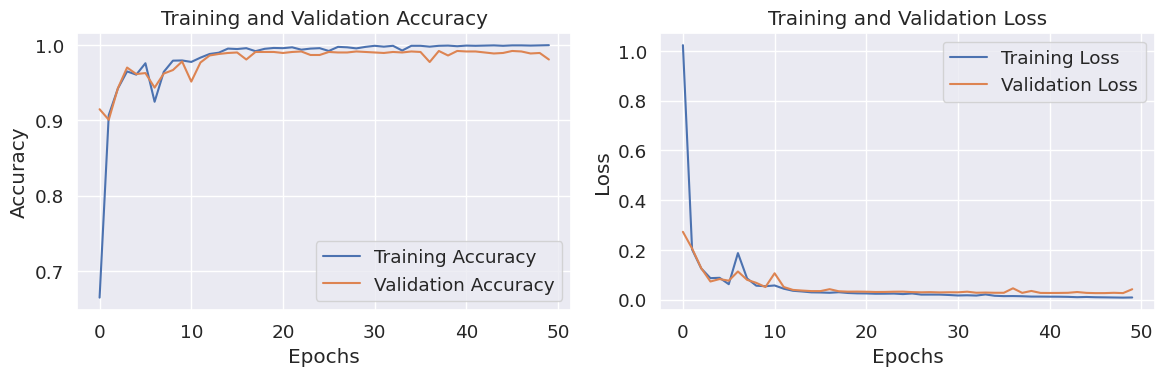

In [ ]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

47/47 [==============================] - 1s 14ms/step - loss: 0.0419 - accuracy: 0.9807
Test Loss: 0.04192640632390976
Test Accuracy: 0.9806666374206543


#precision,recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np
# Assuming y_pred is the array of probabilities from  model
y_pred = model.predict(X_test)
# Convert predictions to class labels
predicted_labels = np.argmax(y_pred, axis=1)
y_test=y_test.argmax(axis=1)
# Calculate precision and recall
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Test precision:', precision)
print('Test recall:', recall)


47/47 [==============================] - 1s 12ms/step
Test precision: 0.9810785284916886
Test recall: 0.9806666666666667


#f1-score


In [ ]:
from keras import backend as K
f1= 2*((precision*recall)/(precision+recall+K.epsilon()))
print('Test F1-score:', f1)

Test F1-score: 0.9808725043446779


#save the model

In [ ]:
model.save('New_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#load the model for re use it later

In [ ]:
# Import necessary libraries
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the model from the H5 file
model = load_model('/content/New_CNN.h5')


#The END